In [3]:
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
uber = pd.read_csv('C:/Users/Hp/Downloads/datasets/uber_data.csv')
uber.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [19]:
#making a copy
datacopy =uber.copy()
# delete the last line
datacopy = datacopy.drop(datacopy.index[1155])

In [20]:
start_list = [info.split(' ') for info in datacopy['START_DATE*'].tolist()]

In [22]:
#splitting the date and time
start_list = [info.split(' ') for info in datacopy['START_DATE*'].tolist()]
stop_list  = [info.split(' ') for info in datacopy['END_DATE*'].tolist()]

start  = pd.DataFrame(start_list,columns=['Start_Date','Start_Time'])
end    = pd.DataFrame(stop_list,columns=['End_Date','End_Time'])

sub_data = datacopy[['CATEGORY*','START*','STOP*','MILES*','PURPOSE*']]
start_end_total = pd.concat([start,end,],axis=1)


In [24]:
datacopy.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [25]:
datacopy = pd.concat([ start_end_total, sub_data],axis=1)

In [26]:
datacopy.head()

,Start_Date,Start_Time,End_Date,End_Time,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016,21:11,1/1/2016,21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016,1:25,1/2/2016,1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016,20:25,1/2/2016,20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016,17:31,1/5/2016,17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016,14:42,1/6/2016,15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [27]:
datacopy['MILES*'].value_counts()

9.9      28
3.1      26
2.1      19
10.4     19
2.5      19
         ..
310.3     1
11.1      1
10.7      1
195.6     1
22.7      1
Name: MILES*, Length: 256, dtype: int64

In [32]:
ml_dis = datacopy['MILES*']
ml_range_list =['<=5', '5-10', '10-15', '15-20', '>20'] 

Miles:
 <=5      502
5-10     338
10-15    161
>20       83
15-20     71
dtype: int64


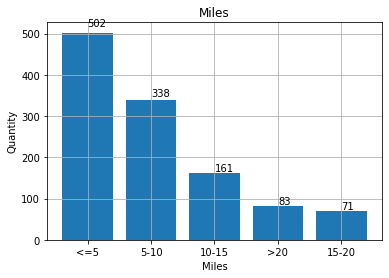

In [33]:
ml_dis=datacopy["MILES*"]
ml_range_lst=["<=5","5-10","10-15","15-20",">20"]
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.03*height, '%s' % int(height))
ml_dic=dict()
for item in ml_range_lst:
    ml_dic[item]=0
for mile in ml_dis.values:
    if mile<=5:
        ml_dic["<=5"]+=1
    elif mile<=10:
        ml_dic["5-10"]+=1
    elif mile<=15:
        ml_dic["10-15"]+=1
    elif mile<=20:
        ml_dic["15-20"]+=1
    else:
        ml_dic[">20"]+=1
ml_dis=pd.Series(ml_dic)
ml_dis.sort_values(inplace=True,ascending=False)
print("Miles:\n",ml_dis)
#figure
rects=plt.bar(range(1,len(ml_dis.index)+1),ml_dis.values)
plt.title("Miles")
plt.xlabel("Miles")
plt.ylabel("Quantity")
plt.xticks(range(1,len(ml_dis.index)+1),ml_dis.index)
plt.grid()
autolabel(rects)
plt.savefig("./ml_dis_fig")
            

In [34]:
datacopy['PURPOSE*'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

In [36]:
datacopy.isnull().sum()

Start_Date      0
Start_Time      0
End_Date        0
End_Time        0
CATEGORY*       0
START*          0
STOP*           0
MILES*          0
PURPOSE*      502
dtype: int64

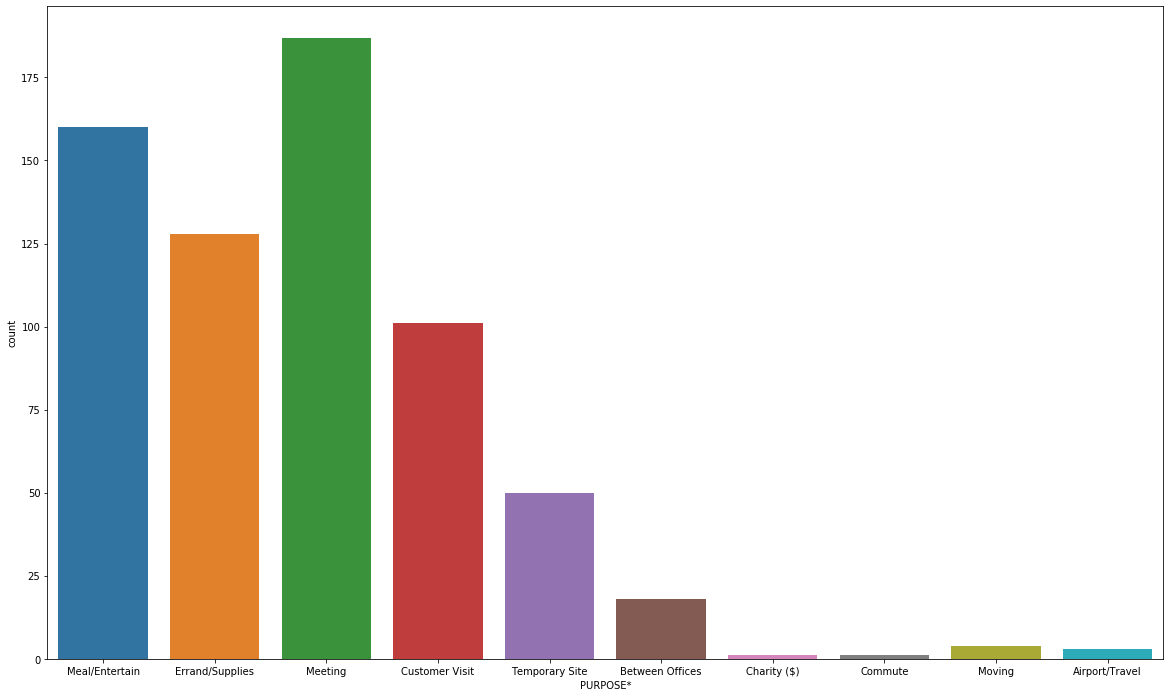

In [39]:
plt.figure(figsize = (20,12))
sns.countplot(datacopy['PURPOSE*'])

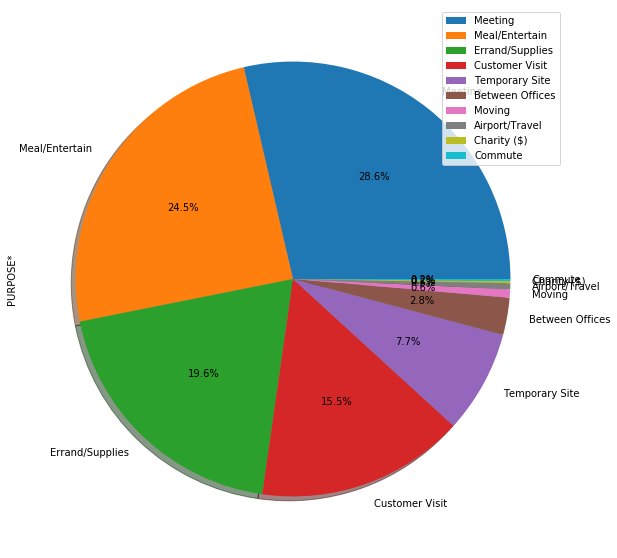

In [42]:
plt.figure(figsize=(10,10))
datacopy['PURPOSE*'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,legend = True)
plt.show()
#showing a pie chart

In [43]:
datacopy.head()

,Start_Date,Start_Time,End_Date,End_Time,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016,21:11,1/1/2016,21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016,1:25,1/2/2016,1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016,20:25,1/2/2016,20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016,17:31,1/5/2016,17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016,14:42,1/6/2016,15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


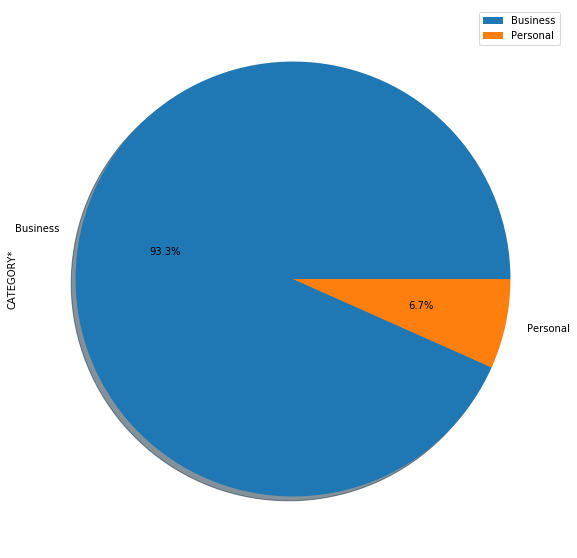

In [51]:
plt.figure(figsize=(10,10))
datacopy['CATEGORY*'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,legend = True)
plt.show()

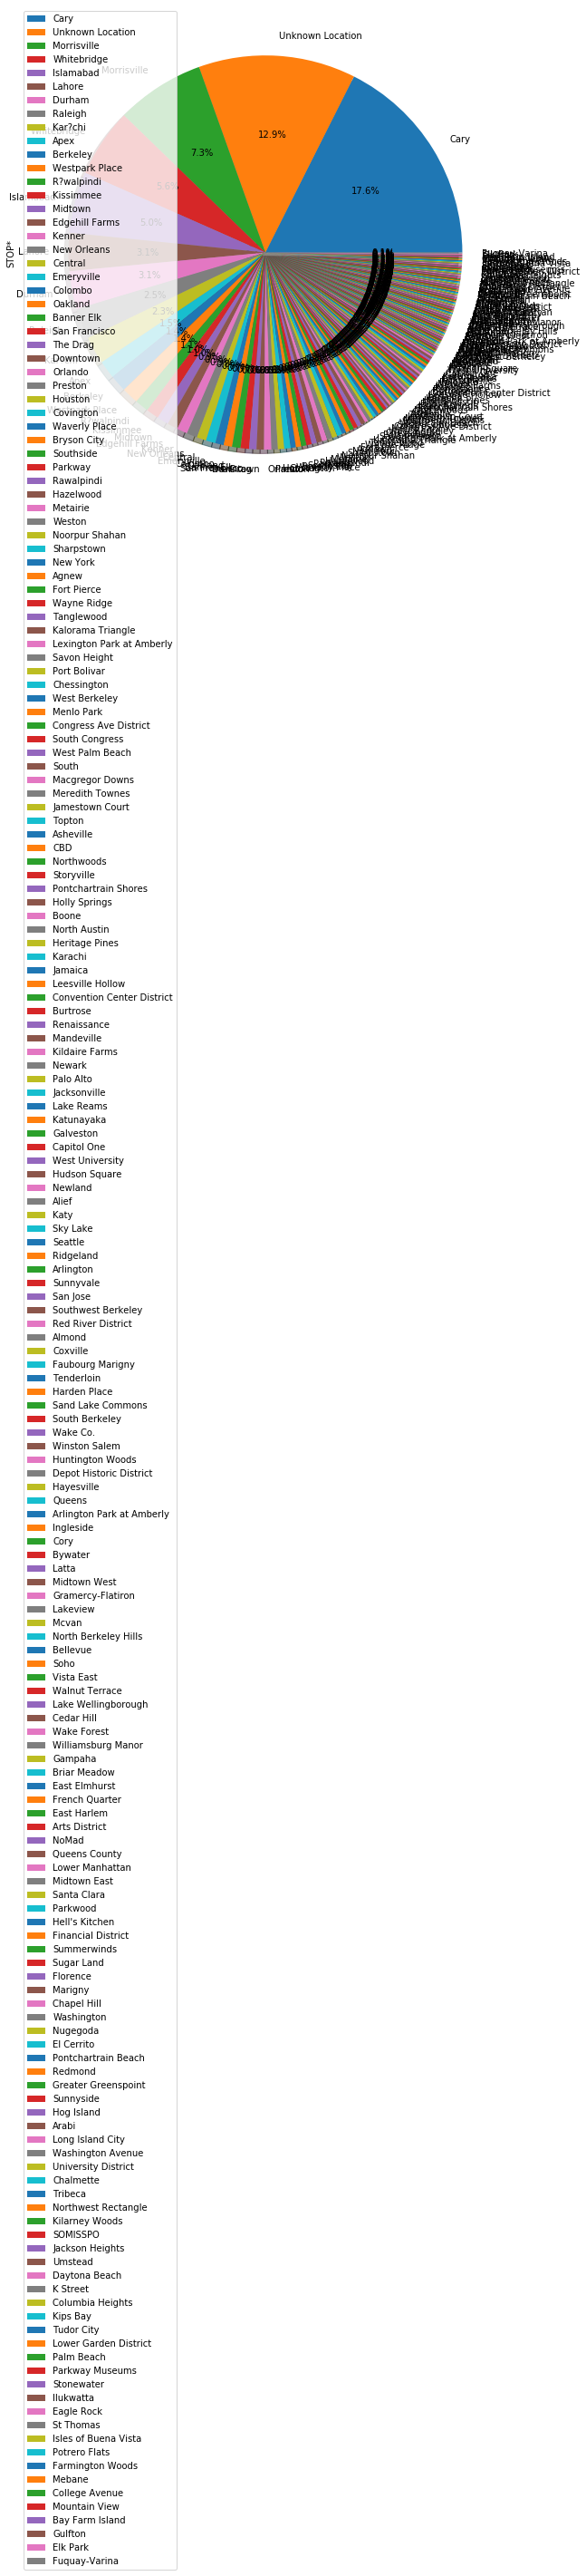

In [52]:
plt.figure(figsize=(10,10))
datacopy['STOP*'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,legend = True)
plt.show()

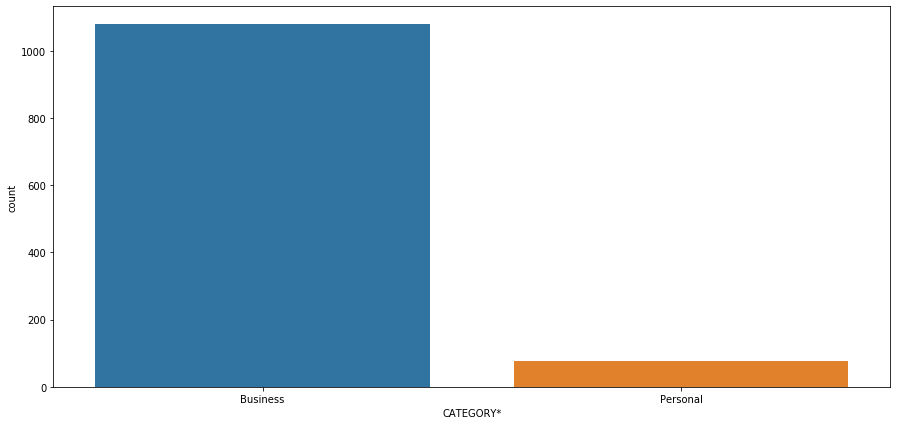

In [53]:
plt.figure(figsize = (15,7))
sns.countplot(datacopy['CATEGORY*'])

In [58]:
datacopy.head(3)

,Start_Date,Start_Time,End_Date,End_Time,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01,21:11,1/1/2016,21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,1:25,1/2/2016,1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02,20:25,1/2/2016,20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [62]:
datacopy["Start_Date"]=pd.to_datetime(datacopy["Start_Date"],format="%m/%d/%Y")
per_month=datacopy['Start_Date'].dt.month.value_counts()#counting monthwise distribution
per_month=per_month.sort_index()#sorting according days in a month
per_month_mean = per_month.mean()
print("Month Distribution:\n",per_month)

Month Distribution:
 1      61
2     115
3     113
4      54
5      49
6     108
7     112
8     133
9      36
10    106
11    122
12    146
Name: Start_Date, dtype: int64


In [63]:
per_month_mean

96.25

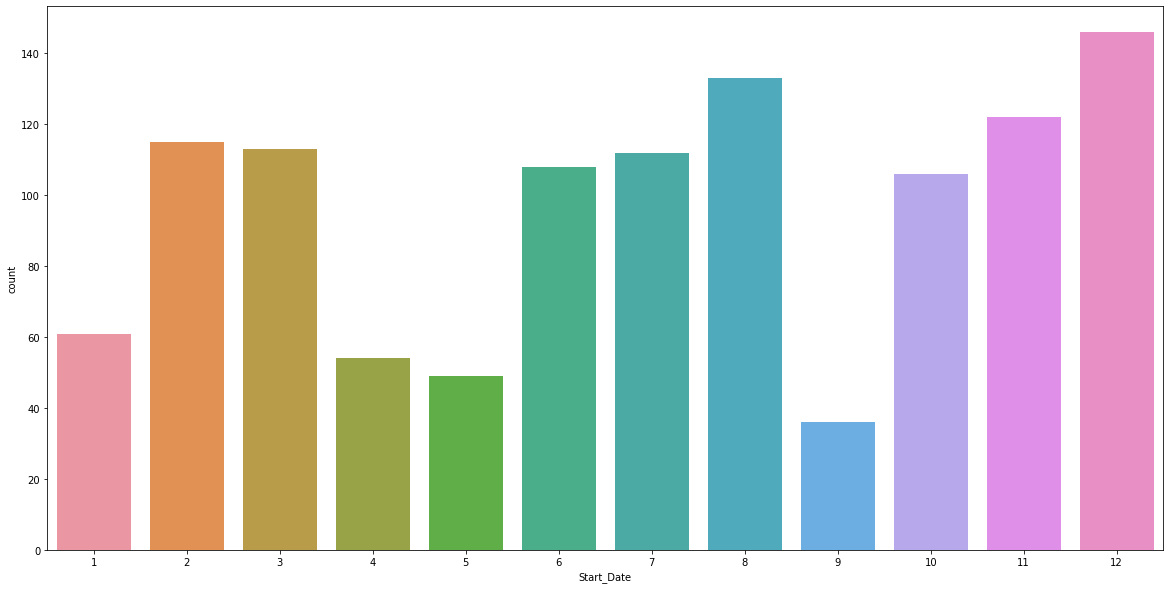

In [65]:
plt.figure(figsize=(20,10))
sns.countplot(datacopy['Start_Date'].dt.month)#plotting according to month

In [67]:
datacopy["Start_Time"] = pd.to_datetime(datacopy['Start_Time'], format = "%H:%M")
per_hour = datacopy['Start_Time'].dt.hour.value_counts()
per_hour = per_hour.sort_index()
per_hour_mean = per_hour.mean()
print("hourly distribution:\n", per_hour)

hourly distribution:
 0     19
1      5
2      2
3      3
5      4
6      4
7     13
8     35
9     51
10    65
11    72
12    77
13    94
14    89
15    98
16    88
17    95
18    94
19    68
20    71
21    51
22    31
23    26
Name: Start_Time, dtype: int64


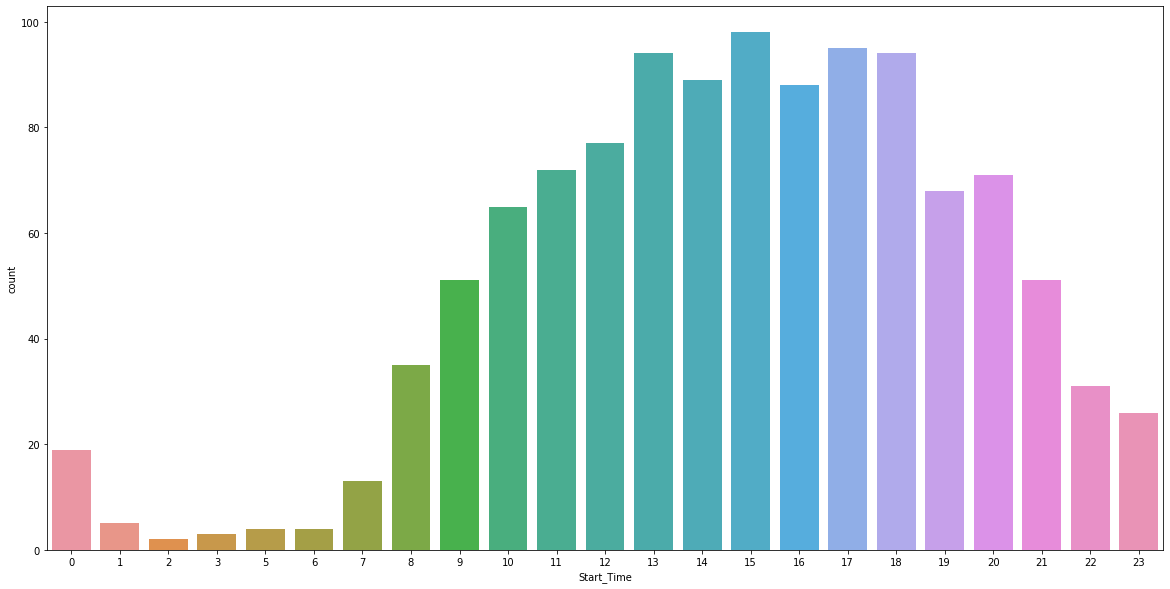

In [69]:
plt.figure(figsize=(20,10))
sns.countplot(datacopy['Start_Time'].dt.hour)

In [70]:
Pur_Mil = datacopy.groupby('PURPOSE*').mean()
Pur_Mil

,MILES*
PURPOSE*,
Airport/Travel,5.500000
Between Offices,10.944444
Charity ($),15.100000
Commute,180.200000
Customer Visit,20.688119
Errand/Supplies,3.968750
Meal/Entertain,5.698125
Meeting,15.247594
Moving,4.550000


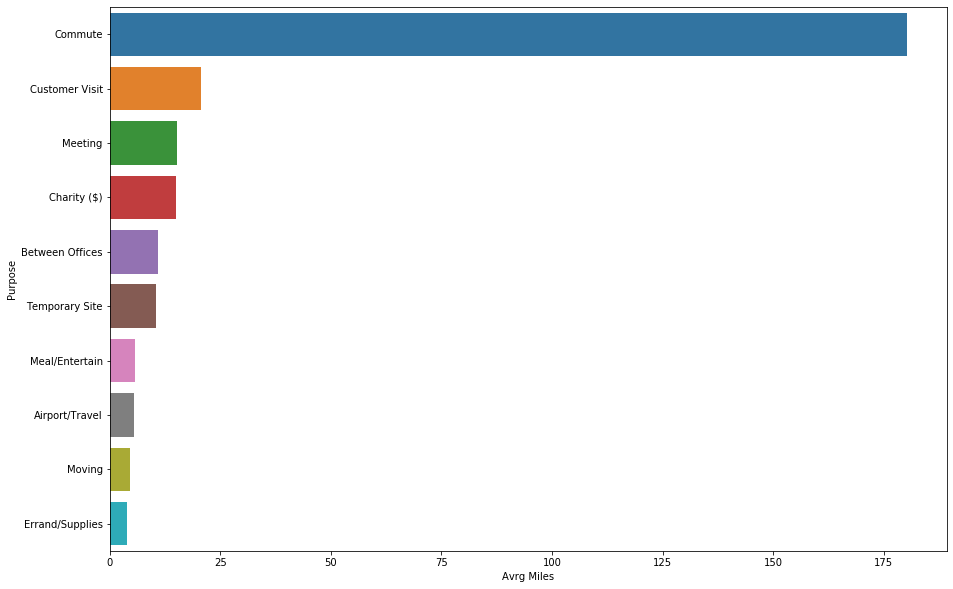

In [71]:
plt.figure(figsize=(15,10))
Pur_Mil['PURPOSE*']=Pur_Mil.index.tolist()
ax = sns.barplot(x='MILES*',y='PURPOSE*',data=Pur_Mil,order=Pur_Mil.sort_values('MILES*',ascending=False)['PURPOSE*'].tolist())
ax.set(xlabel='Avrg Miles', ylabel='Purpose')
plt.show()

In [75]:
rides_per_month = datacopy.groupby('Start_Date').sum()
rides_per_month['Month']=pd.to_datetime(rides_per_month.index.tolist()) #converting dates to a python friendly format
rides_per_month['Month']= rides_per_month['Month'].dt.to_period("M") #grouping dates by month
rides_per_month= rides_per_month.sort_values(by= 'Month',ascending=True)
total_miles_per_month =rides_per_month.groupby('Month').sum()
total_miles_per_month['MONTH'] = total_miles_per_month.index.tolist()
total_miles_per_month['MONTH'] = total_miles_per_month['MONTH'].astype(str) #converting the time stamp format to string
plt.figure(figsize=(15,10))
ax = sns.barplot(x='MILES*',y='MONTH',data=total_miles_per_month,order=total_miles_per_month.sort_values('MONTH',ascending=False)['MONTH'].tolist())
ax.set(xlabel='Total Miles', ylabel='Month')
plt.show()

DateParseError: Unknown datetime string format, unable to parse: MONTH

<Figure size 1080x720 with 0 Axes>

In [78]:
CAT_Mil_Mean = datacopy.groupby('PURPOSE*').mean()
CAT_Mil_Mean

,MILES*
PURPOSE*,
Airport/Travel,5.500000
Between Offices,10.944444
Charity ($),15.100000
Commute,180.200000
Customer Visit,20.688119
Errand/Supplies,3.968750
Meal/Entertain,5.698125
Meeting,15.247594
Moving,4.550000


<function matplotlib.pyplot.show(*args, **kw)>

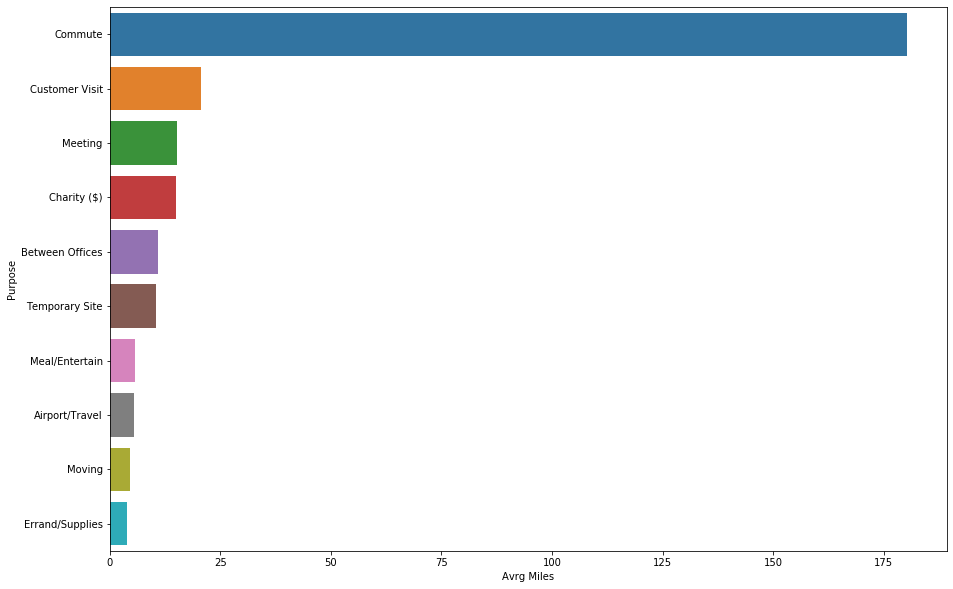

In [79]:
plt.figure(figsize=(15,10))
CAT_Mil_Mean['PURPOSE*']=CAT_Mil_Mean.index.tolist()
ax = sns.barplot(x='MILES*',y='PURPOSE*',data=CAT_Mil_Mean ,order=CAT_Mil_Mean.sort_values('MILES*',ascending=False)['PURPOSE*'].tolist())
ax.set(xlabel='Avrg Miles', ylabel='Purpose')
plt.show

In [80]:
datacopy.head(3)

,Start_Date,Start_Time,End_Date,End_Time,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01,1900-01-01 21:11:00,1/1/2016,21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,1900-01-01 01:25:00,1/2/2016,1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02,1900-01-01 20:25:00,1/2/2016,20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [81]:
#calculating velocity in each row
datacopy["End_Time"]=pd.to_datetime(datacopy["End_Time"],format="%H:%M")
datacopy["Start_Time"]=pd.to_datetime(datacopy["Start_Time"],format="%H:%M")
speed=datacopy["MILES*"]/((datacopy["End_Time"]-datacopy["Start_Time"]).dt.seconds/60)
print(speed)

0       0.850000
1       0.416667
2       0.369231
3       0.335714
4       0.950746
          ...   
1150    0.100000
1151    0.216667
1152    0.462857
1153    0.355556
1154    0.467961
Length: 1155, dtype: float64


In [82]:
speed.head()

0    0.850000
1    0.416667
2    0.369231
3    0.335714
4    0.950746
dtype: float64